In [16]:
#  \file
#  \ingroup tutorial_tmva
#  \notebook
#   TMVA Classification Example Using a Recurrent Neural Network
# 
#  This is an example of using a RNN in TMVA. We do classification using a toy time dependent data set
#  that is generated when running this example macro
# 
#  \macro_image
#  \macro_output
#  \macro_code
# 
#  \author Neel Shah


# TMVA Classification Example Using a Recurrent Neural Network

# This is an example of using a RNN in TMVA.
# We do the classification using a toy data set containing a time series of data sample ntimes
# and with dimension ndim that is generated when running the provided function `MakeTimeData (nevents, ntime, ndim)`

import ROOT
from ROOT import TMVA

ninput = 30
# ninput=10
ntime = 10
# batchSize = 100
batchSize = 100
maxepochs = 20

use_type = 1

nTotEvts = 10000 # total events to be generated for signal or background

useKeras = True


useTMVA_RNN = True
useTMVA_DNN = True
useTMVA_BDT = False

In [17]:

rnn_types = ["RNN", "LSTM", "GRU"]
use_rnn_type = [1, 1, 1]
if (use_type >=0 & use_type < 3) :
      use_rnn_type = [0,0,0]
      use_rnn_type[use_type] = 1;



In [18]:
archString = "CPU"
writeOutputFile = True

In [19]:
rnn_type = "RNN"

In [20]:
ROOT.TMVA.PyMethodBase.PyInitialize()

In [21]:
num_threads = 0   # use by default all threads
#    do enable MT running
if (num_threads >= 0):
    ROOT.EnableImplicitMT(num_threads)
    if (num_threads > 0):
        ROOT.gSystem.Setenv("OMP_NUM_THREADS", num_threads)
    else:
      ROOT.gSystem.Setenv("OMP_NUM_THREADS", "1")

ROOT.TMVA.Config.Instance()

print("Running with nthreads  = " + str(ROOT.GetThreadPoolSize()) + "\n" )

inputFileName = "time_data_t10_d30.root";

fileExist = ROOT.gSystem.AccessPathName(inputFileName)

#if file does not exists create it
if (fileExist==None):
    MakeTimeData(nTotEvts,ntime, ninput)

inputFile = ROOT.TFile.Open(inputFileName)
if (inputFile==None):
    Error("TMVA_RNN_Classification", "Error opening input file %s - exit", inputFileName.Data())



Running with nthreads  = 4



In [22]:
print("--- RNNClassification  : Using input file: " + inputFile.GetName()+"\n")

#   Create a ROOT output file where TMVA will store ntuples, histograms, etc.
outfileName = "data_RNN_"+ archString +".root"

if (writeOutputFile):
    outputFile = ROOT.TFile.Open(outfileName, "RECREATE")

'''
    ## Declare Factory

    Create the Factory class. Later you can choose the methods
    whose performance you'd like to investigate.

    The factory is the major TMVA object you have to interact with. Here is the list of parameters you need to
pass

    - The first argument is the base of the name of all the output
    weightfiles in the directory weight/ that will be created with the
    method parameters

    - The second argument is the output file for the training results

    - The third argument is a string option defining some general configuration for the TMVA session.
      For example all TMVA output can be suppressed by removing the "!" (not) in front of the "Silent" argument in
the option string

'''

--- RNNClassification  : Using input file: time_data_t10_d30.root



'\n    ## Declare Factory\n\n    Create the Factory class. Later you can choose the methods\n    whose performance you\'d like to investigate.\n\n    The factory is the major TMVA object you have to interact with. Here is the list of parameters you need to\npass\n\n    - The first argument is the base of the name of all the output\n    weightfiles in the directory weight/ that will be created with the\n    method parameters\n\n    - The second argument is the output file for the training results\n\n    - The third argument is a string option defining some general configuration for the TMVA session.\n      For example all TMVA output can be suppressed by removing the "!" (not) in front of the "Silent" argument in\nthe option string\n\n'

In [23]:
#  Creating the factory object
factory = ROOT.TMVA.Factory("TMVAClassification", outputFile,"!V:!Silent:Color:DrawProgressBar:Transformations=None:!Correlations:"+"AnalysisType=Classification:ModelPersistence")
dataloader =TMVA.DataLoader("dataset")

signalTree = inputFile.Get("sgn")
background = inputFile.Get("bkg")

signalTree.Print()
nvar = ninput * ntime

# add variables - use new AddVariablesArray function
for i in range(ntime):
    varName = "vars_time"+str(i)
    dataloader.AddVariablesArray(varName,ninput,'F')

dataloader.AddSignalTree(signalTree, 1.0)
dataloader.AddBackgroundTree(background, 1.0)

# check given input
datainfo = dataloader.GetDataSetInfo()
vars = datainfo.GetListOfVariables()
print("number of variables is " + str(vars.size())+ "\n")
for v in vars:
    print(str(v)+"\n")

nTrainSig = 0.8 * nTotEvts
nTrainBkg = 0.8 *  nTotEvts

#build the string options for DataLoader::PrepareTrainingAndTestTree
prepareOptions = "nTrain_Signal="+str(nTrainSig)+":nTrain_Background="+str(nTrainBkg)+":SplitMode=Random:SplitSeed=100:NormMode=NumEvents:!V:!CalcCorrelations"

number of variables is 300

vars_time0[0]

vars_time0[1]

vars_time0[2]

vars_time0[3]

vars_time0[4]

vars_time0[5]

vars_time0[6]

vars_time0[7]

vars_time0[8]

vars_time0[9]

vars_time0[10]

vars_time0[11]

vars_time0[12]

vars_time0[13]

vars_time0[14]

vars_time0[15]

vars_time0[16]

vars_time0[17]

vars_time0[18]

vars_time0[19]

vars_time0[20]

vars_time0[21]

vars_time0[22]

vars_time0[23]

vars_time0[24]

vars_time0[25]

vars_time0[26]

vars_time0[27]

vars_time0[28]

vars_time0[29]

vars_time1[0]

vars_time1[1]

vars_time1[2]

vars_time1[3]

vars_time1[4]

vars_time1[5]

vars_time1[6]

vars_time1[7]

vars_time1[8]

vars_time1[9]

vars_time1[10]

vars_time1[11]

vars_time1[12]

vars_time1[13]

vars_time1[14]

vars_time1[15]

vars_time1[16]

vars_time1[17]

vars_time1[18]

vars_time1[19]

vars_time1[20]

vars_time1[21]

vars_time1[22]

vars_time1[23]

vars_time1[24]

vars_time1[25]

vars_time1[26]

vars_time1[27]

vars_time1[28]

vars_time1[29]

vars_time2[0]

vars_time2[1]

va

In [24]:
# Apply additional cuts on the signal and background samples (can be different)
mycuts = ROOT.TCut("")   ## for example: TCut mycuts = "abs(var1)<0.5 && abs(var2-0.5)<1";
mycutb = ROOT.TCut("")   ## for example: TCut mycutb = "abs(var1)<0.5";

dataloader.PrepareTrainingAndTestTree(mycuts, mycutb, prepareOptions)

print("prepared DATA LOADER " )

prepared DATA LOADER 


In [25]:
'''
## Book TMVA  recurrent models

Book the different types of recurrent models in TMVA  (SimpleRNN, LSTM or GRU)
'''

if (useTMVA_RNN):
    for i in range(3):
        if (use_rnn_type[i]==None):
            continue
        rnn_type = str(rnn_types[i])

#          define the inputlayout string for RNN
#          the input data should be organize as   following:
#          input layout for RNN:    time x ndim

        inputLayoutString = "InputLayout="+str(ntime)+"|"+str(ninput)

        # Define RNN layer layout
        # it should be   LayerType (RNN or LSTM or GRU) |  number of units | number of inputs | time steps | remember output (typically no=0 | return full sequence
        rnnLayout = str(rnn_type) + "|10|"+ str(ninput) + "|" + str(ntime) + "|0|1"

        #        add after RNN a reshape layer (needed top flatten the output) and a dense layer with 64 units and a last one
        #        Note the last layer is linear because  when using Crossentropy a Sigmoid is applied already
        layoutString ="Layout=" + rnnLayout + ",RESHAPE|FLAT,DENSE|64|TANH,LINEAR"

        #Defining Training strategies. Different training strings can be concatenate. Use however only one
        trainingString1 = "LearningRate=1e-3,Momentum=0.0,Repetitions=1,"+"ConvergenceSteps=5,BatchSize="+str(batchSize)+",TestRepetitions=1,"+"WeightDecay=1e-2,Regularization=None,MaxEpochs="+str(maxepochs
        )+","+"Optimizer=ADAM,DropConfig=0.0+0.+0.+0."

        trainingStrategyString="TrainingStrategy="
        trainingStrategyString += trainingString1; # + "|" + trainingString2

        # Define the full RNN Noption string adding the final options for all network
        rnnOptions = "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:"+"WeightInitialization=XAVIERUNIFORM:ValidationSize=0.2:RandomSeed=1234"
        rnnOptions +=  ":" + inputLayoutString
        rnnOptions +=  ":" + layoutString
        rnnOptions +=  ":" + trainingStrategyString
        rnnOptions +=  ":" + "Architecture=" + str(archString)

        rnnName = "TMVA_" + rnn_type
        factory.BookMethod(dataloader, TMVA.Types.kDL, rnnName, rnnOptions)


Factory                  : Booking method: TMVA_RNN
                         : 
                         : Parsing option string: 
                         : ... "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:WeightInitialization=XAVIERUNIFORM:ValidationSize=0.2:RandomSeed=1234:InputLayout=10|30:Layout=RNN|10|30|10|0|1,RESHAPE|FLAT,DENSE|64|TANH,LINEAR:TrainingStrategy=LearningRate=1e-3,Momentum=0.0,Repetitions=1,ConvergenceSteps=5,BatchSize=100,TestRepetitions=1,WeightDecay=1e-2,Regularization=None,MaxEpochs=20,Optimizer=ADAM,DropConfig=0.0+0.+0.+0.:Architecture=CPU"
                         : The following options are set:
                         : - By User:
                         :     <none>
                         : - Default:
                         :     Boost_num: "0" [Number of times the classifier will be boosted]
                         : Parsing option string: 
                         : ... "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:WeightInitialization=

In [26]:
'''
## Book TMVA  fully connected dense layer  models
'''

if (useTMVA_DNN):
#    Method DL with Dense Layer
    inputLayoutString = "InputLayout=1|1|" + str(ntime * ninput)

    layoutString = "Layout=DENSE|64|TANH,DENSE|TANH|64,DENSE|TANH|64,LINEAR"
#   Training strategies.
    trainingString1 = "LearningRate=1e-3,Momentum=0.0,Repetitions=1,"+"ConvergenceSteps=10,BatchSize=256,TestRepetitions=1,"+"WeightDecay=1e-4,Regularization=None,MaxEpochs=20"+"DropConfig=0.0+0.+0.+0.,Optimizer=ADAM"
    trainingStrategyString = "TrainingStrategy="
    trainingStrategyString += trainingString1 # + "|" + trainingString2

      # General Options.
    dnnOptions = "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:"+"WeightInitialization=XAVIER:RandomSeed=0" 

    dnnOptions +=  ":" + inputLayoutString
    dnnOptions +=  ":" + layoutString
    dnnOptions +=  ":" + trainingStrategyString
    dnnOptions +=  ":" + "Architecture=" + str(archString)


    dnnName = "TMVA_DNN"
    factory.BookMethod(dataloader, TMVA.Types.kDL, dnnName, dnnOptions)
   


Factory                  : Booking method: TMVA_DNN
                         : 
                         : Parsing option string: 
                         : ... "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:WeightInitialization=XAVIER:RandomSeed=0:InputLayout=1|1|300:Layout=DENSE|64|TANH,DENSE|TANH|64,DENSE|TANH|64,LINEAR:TrainingStrategy=LearningRate=1e-3,Momentum=0.0,Repetitions=1,ConvergenceSteps=10,BatchSize=256,TestRepetitions=1,WeightDecay=1e-4,Regularization=None,MaxEpochs=20DropConfig=0.0+0.+0.+0.,Optimizer=ADAM:Architecture=CPU"
                         : The following options are set:
                         : - By User:
                         :     <none>
                         : - Default:
                         :     Boost_num: "0" [Number of times the classifier will be boosted]
                         : Parsing option string: 
                         : ... "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=None:WeightInitialization=XAVIER:RandomSeed=0:InputLayo

In [27]:
'''
    ## Book Keras recurrent models

     Book the different types of recurrent models in Keras  (SimpleRNN, LSTM or GRU)
'''
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, BatchNormalization


if (useKeras):
    for i in range(3):
        if (use_rnn_type[i]):
            modelName = "model_" + str(rnn_types[i]) + ".h5"
            trainedModelName = "trained_model_"+ str(rnn_types[i]) + ".h5"

            ROOT.Info("TMVA_RNN_Classification", "Building recurrent keras model using a"+str(rnn_types[i])+" layer")
            # create python script which can be executed
            # create 2 conv2d layer + maxpool + dense
        
            
            
            model = Sequential()
            model.add(Reshape((10, 30), input_shape = (10*30, )))
            # add recurrent neural network depending on type / Use option to return the full output
            if (rnn_types[i] == "LSTM"):
               model.add(LSTM(units=10, return_sequences=True) )
            elif (rnn_types[i] == "GRU"):
               model.add(GRU(units=10, return_sequences=True) )
            else:
               model.add(SimpleRNN(units=10, return_sequences=True) )

            model.add(BatchNormalization())
            model.add(Flatten())# needed if returning the full time output sequen
            model.add(Dense(64, activation = 'tanh')) 
            model.add(Dense(2, activation = 'sigmoid')) 
            model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
            
            model.save(modelName)
            model.summary()

#             m.SaveSource("make_rnn_model.py");
#              execute
            ROOT.gSystem.Exec("python make_rnn_model.py")

            if (ROOT.gSystem.AccessPathName(modelName)):
               Warning("TMVA_RNN_Classification", "Error creating Keras recurrent model file - Skip using Keras")
               useKeras = False
            else:
               # book PyKeras method only if Keras model could be created
               ROOT.Info("TMVA_RNN_Classification", "Booking Keras" + str(rnn_types[i]) +  "model")
               factory.BookMethod(dataloader, TMVA.Types.kPyKeras,"PyKeras_"+ str(rnn_types[i]),"!H:!V:VarTransform=None:FilenameModel="+str(modelName)+":tf.keras:"+"FilenameTrainedModel="+str(trainedModelName)+":GpuOptions=allow_growth=True:"+"NumEpochs="+str(maxepochs)+":BatchSize="+str(batchSize))
                                                   


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 10, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 10)            1640      
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10)           40        
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                      

Info in <TMVA_RNN_Classification>: Building recurrent keras model using aLSTM layer
2022-03-29 03:28:51.257561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/neel/Root/install/lib:/opt/ros/noetic/lib
2022-03-29 03:28:51.257585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-29 03:28:52.851468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/neel/Root/install/lib:/opt/ros/noetic/lib
2022-03-29 03:28:52.851499: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 03:28:52.851520: I tensorflow/stream_exe

In [28]:
# Train all methods
factory.TrainAllMethods()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 10, 30)            0         
                                                                 
 lstm (LSTM)                 (None, 10, 10)            1640      
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,234
Trainable params: 8,234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
120/128 [===========================>..] - 

In [29]:
print("nthreads  = "+ str(ROOT.GetThreadPoolSize()) + "\n")

# Evaluate all MVAs using the set of test events
factory.TestAllMethods()



nthreads  = 4

Factory                  : Test all methods
Factory                  : Test method: TMVA_RNN for Classification performance
                         : 
                         : Evaluate deep neural network on CPU using batches with size = 1000
                         : 
TMVA_RNN                 : [dataset] : Evaluation of TMVA_RNN on testing sample (4000 events)
                         : Elapsed time for evaluation of 4000 events: 0.0698 sec       
Factory                  : Test method: TMVA_LSTM for Classification performance
                         : 
                         : Evaluate deep neural network on CPU using batches with size = 1000
                         : 
TMVA_LSTM                : [dataset] : Evaluation of TMVA_LSTM on testing sample (4000 events)
                         : Elapsed time for evaluation of 4000 events: 0.156 sec       
Factory                  : Test method: TMVA_GRU for Classification performance
                         : 
      

In [30]:
# Evaluate and compare performance of all configured MVAs
factory.EvaluateAllMethods()
#  check method



Factory                  : Evaluate all methods
Factory                  : Evaluate classifier: TMVA_RNN
                         : 
TMVA_RNN                 : [dataset] : Loop over test events and fill histograms with classifier response...
                         : 
                         : Evaluate deep neural network on CPU using batches with size = 1000
                         : 
                         : Dataset[dataset] :  variable plots are not produces ! The number of variables is 300 , it is larger than 200
Factory                  : Evaluate classifier: TMVA_LSTM
                         : 
TMVA_LSTM                : [dataset] : Loop over test events and fill histograms with classifier response...
                         : 
                         : Evaluate deep neural network on CPU using batches with size = 1000
                         : 
                         : Dataset[dataset] :  variable plots are not produces ! The number of variables is 300 , it is larger 

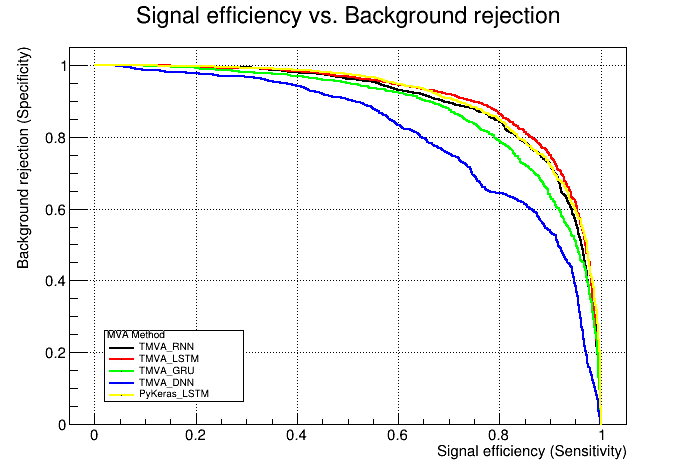

In [31]:
#  plot ROC curve
c1 = factory.GetROCCurve(dataloader)
c1.Draw()

   

In [32]:
if (outputFile):
    outputFile.Close()